# Лабораторная работа 1
#### Жерлыгин Максим

In [1]:
%pip install pandas
%pip install numpy
%pip install sklearn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# О датасете

Был выбран датасет с информацией о 303 пациентах: пол, возраст, артериальное давление в состоянии покоя, тип боли в груди и прочие. По указанным признакам необходимо классифицировать пациента к одной из пяти категорий: 0, 1, 2, 3, 4, определяющей вероятность наличия у человека сердечного заболевания (где 0 - нет заболевания, 4 - точно есть).

http://archive.ics.uci.edu/ml/datasets/Heart+Disease

Из 75 исходных атрибутов в датасете оставили 14 основных:
1. **age** - возраст (кол)
2. **sex** - пол (кач)
3. **cp** - тип боли в груди (кач) 
4. **trestbps** - артериальное давление в состоянии покоя (кол)
5. **chol** - холестерин (кол)
6. **fbs** - больше ли уровень сахара натощак 120 мг/дл (кач) 
7. **restecg** - ЭКГ в покое (кач)
8. **thalach** - максимальная частота сердцебиения (кол)
9. **exang** - наличие стенокардии во время физической нагрузки (кач)
10. **oldpeak** - ST-депрессия после нагрузки относительно состояния покоя (кол)
11. **slope** - тип наклона (кач)
12. **ca** - количество крупных сосудов (0-3), окрашенных флурозопией (кач)
13. **thal** - оценка сердцебиения (кач)
14. **num** (the predicted attribute) - шанс (от 0 до 4) наличия сердечного заболевания (кач)


Все значения - числовые.
В некоторых записях есть отсутствующие поля (вместо значения стоит знак вопроса '?').

### Работа с датасетом

Исходный файл имеет внутреннее представление **csv**-файлов: данные разделены запятыми.


Строка с названиями столбцов была добавлена вручную. Выберем из датасета первые 10 записей, которые будут играть роль тестовой выборки.

Импортируем модуль pandas и загрузим датесеты из файлов.

In [2]:
import pandas as pd

df = pd.read_csv('processed.cleveland.csv')
df_test = pd.read_csv('test.processed.cleveland.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
1,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
2,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
3,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
4,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
289,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
290,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
291,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


### Найдем столбцы, в которых содержатся неизвестные значения

In [5]:
columns_with_invalid_data = set()

for col in df:
    for el in df[col]:
        if el == '?':
            columns_with_invalid_data.add(col)
            
print(columns_with_invalid_data)

{'ca', 'thal'}


Удалим строки, в которых есть неизвестные значения

In [6]:
for col_name in columns_with_invalid_data:
    df.drop(df[df[col_name] == '?'].index, inplace=True)

df.reset_index(inplace=True, drop=True)

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
1,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
2,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
3,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
4,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
283,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
284,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
285,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


Количество мужчин и женщин:

In [8]:
print('male = ', df['sex'].value_counts()[1.0])
print('female = ', df['sex'].value_counts()[0.0])

male =  194
female =  93


Попробуем обнаружить корреляцию между количественными признаками.

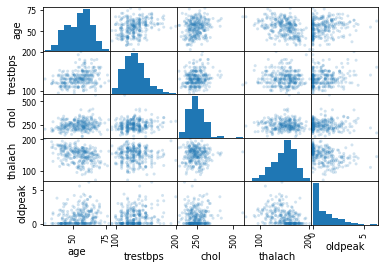

In [9]:
import matplotlib.pyplot as plt

coli = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']        
pd.plotting.scatter_matrix(df[coli], alpha=0.2);

Корреляция не обнаружена. Проверим качественные признаки.

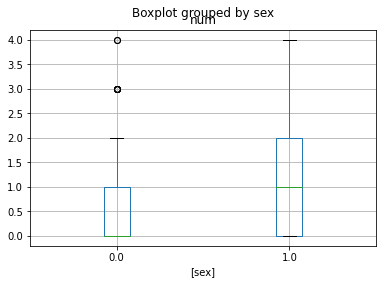

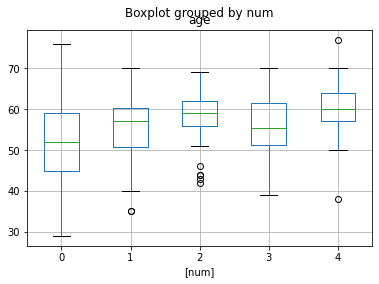

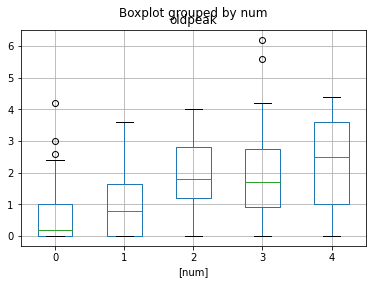

In [10]:
df[['num', 'sex']].boxplot(by='sex');

# # uncomment to plot all graphs
# for i in coli:
#     cach = ['num', i]
#     df[cach].boxplot(by='num');

df[['num', 'age']].boxplot(by='num');
df[['num', 'oldpeak']].boxplot(by='num');

По полученным графикам можно сделать следующие выводы:
1. В среднем вероятность найти сердечное заболевание у мужчин выше, чем у женщин
2. Средний возраст людей с большим шансом наличия сердечного заболевания выше среднего возраста людей с низким шансом
3. ST-депрессия у людей с большим шансом заболевания выше ST-депрессии у людей с низким шансом

## Подготовка датасета

Для более удобной последующей работы с данными, переместим датафрейм в список списков. 

In [11]:
data = df.values.tolist()
data_test = df_test.values.tolist()

In [12]:
data[0]

[57.0, 1.0, 4.0, 140.0, 192.0, 0.0, 0.0, 148.0, 0.0, 0.4, 2.0, '0.0', '6.0', 0]

In [13]:
data_test[0]

[63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0, 0.0]

Некоторые элементы в обучающей выборке имеют строковый тип, поскольку в исходном датасете в тех столбцах встречались знаки '?'. Конвертируем все данные в числа. В тестовой выборке все элементы числовые, поскольку выбирались только полные записи.

In [14]:
for i in range(len(data)):
    data[i] = list(map(float, data[i]))

In [15]:
data[0]

[57.0, 1.0, 4.0, 140.0, 192.0, 0.0, 0.0, 148.0, 0.0, 0.4, 2.0, 0.0, 6.0, 0.0]

Нормируем данные в диапазон [0, 1] минимакс алгоритмом.

In [16]:
for i in range(len(data[0])-1):
    minv = data[0][i]
    maxv = data[0][i]

    for j in range(len(data)):
        minv = min(minv, data[j][i])
        maxv = max(maxv, data[j][i])
        
    for j in range(len(data_test)):
        minv = min(minv, data_test[j][i])
        maxv = max(maxv, data_test[j][i])

    for j in range(len(data)):
        data[j][i] = (data[j][i] - minv) / (maxv - minv)
        
    for j in range(len(data_test)):
        data_test[j][i] = (data_test[j][i] - minv) / (maxv - minv)
            
print(data[0])
print(data_test[0])

[0.5833333333333334, 1.0, 1.0, 0.4339622641509434, 0.1506849315068493, 0.0, 0.0, 0.5877862595419847, 0.0, 0.06451612903225806, 0.5, 0.0, 0.75, 0.0]
[0.7083333333333334, 1.0, 0.0, 0.4811320754716981, 0.24429223744292236, 1.0, 1.0, 0.6030534351145038, 0.0, 0.3709677419354838, 1.0, 0.0, 0.75, 0.0]


Уберем ответы в отдельный список.

In [17]:
ans = {}
ans_test = {}

for li in data:
    ans[repr(li[:-1])] = li[-1]
    li.pop()

for li in data_test:
    ans_test[repr(li[:-1])] = li[-1]
    li.pop()

## Метод KNN

Введем несколько функций расстояния между элементами датасета, а также весовую функцию.

In [18]:
from math import sqrt

def taxicab(v1, v2):
    return sum([abs(x - y) for x, y in zip(v1, v2)])

def euclidean(v1, v2):
    return sqrt(sum([(x - y)**2 for x, y in zip(v1, v2)]))

def infinity_norm(v1, v2):
    return max([abs(x - y) for x, y in zip(v1, v2)])


def weight(q, i):
    return q**i

Данная реализация алгоритма **KNN** сортирует элементы обучающей выборки по расстоянию до текущего элемента тестовой выборки. После этого первым ***k*** элементам обучающей выборки присваивается вес **weight(q, i)**, где **q**-заранее выбранная константа, **i**-индекс в отсортированном списке. 

Затем по каждой категории для элементов обучающей выборки суммируются их веса. Категория с наибольшим весом - ответ.

In [19]:
import numpy as np
import functools
import operator


def test_knn(q:float, k:int, dist):
    correct = 0
    total = 0

    for test_el in data_test:
        def compare(x, y):
            return dist(test_el, x) - dist(test_el, y)

        sorted_data = sorted(data, key=functools.cmp_to_key(compare))
        
        weights = {}
        for i in range(k):
            if ans[repr(sorted_data[i])] in weights:
                weights[ans[repr(sorted_data[i])]] += weight(q, i)
            else:
                weights[ans[repr(sorted_data[i])]] = weight(q, i)
        
        predict = max(weights.items(), key=operator.itemgetter(1))[0]
        true_ans = ans_test[repr(test_el)]
        
        if predict == true_ans:
            correct += 1
        total += 1
        
    predict_rate = correct / total
    return predict_rate


k = 7
q = 0.8

for dist in [taxicab, euclidean, infinity_norm]:
    print('distance function:', dist.__name__)
    res = test_knn(q, k, dist)
    print('predict rate:', res)

distance function: taxicab
predict rate: 0.7
distance function: euclidean
predict rate: 0.6
distance function: infinity_norm
predict rate: 0.6


## Наивный байесовский классификатор

Классификатор будет работать только с количественными переменными, поскольку у качественных в каждом из классов много повторяющихся значений.

Посчитаем количество элементов в каждом из классов.

In [20]:
classes = dict()

for val in [0.0, 1.0, 2.0, 3.0, 4.0]:
    classes[val] = df['num'].value_counts()[val]

classes

{0.0: 155, 1.0: 52, 2.0: 33, 3.0: 34, 4.0: 13}

Далее в каждом классе оценим вероятность встретить какой-либо конкретный признак. Будем сравнивать количественные переменные с точностью до 1 знака после запятой.

In [21]:
distr = {}
round_value = 1

coli_ids = [df.columns.get_loc(name) for name in coli]

for line in data:
    for i in coli_ids:
        if (ans[repr(line)], round(line[i], round_value)) in distr:
            distr[ans[repr(line)], round(line[i], round_value)] += 1
        else:
            distr[ans[repr(line)], round(line[i], round_value)] = 1

Переходим от количества к вероятностям.

In [22]:
for cl, val in distr:
    distr[cl, val] /= classes[cl]
    
for cl in classes:
    classes[cl] /= df.shape[0]

Проверим работу на тестовой выборке.

In [23]:
from math import log

correct = 0
total = len(data_test)

for line in data_test:
    cur_ans = {'val': 10**7, 'class': -1}
    res_found = False
    
    for cl in classes:
        summ = -log(classes[cl])
        for i in coli_ids:
            if (cl, round(line[i], round_value)) not in distr:
                summ += 10**7
            else:
                summ += -log(distr[cl, round(line[i], round_value)])
        if summ < cur_ans['val']:
            res_found = True
            cur_ans['val'] = summ
            cur_ans['class'] = cl
            
    if res_found and cur_ans['class'] == ans_test[repr(line)]:
        correct += 1
            
print('predict rate: ', correct / total)

predict rate:  0.5


Полученный результат несколько ниже, чем в методе **KNN**, поскольку метод не слишком хорошо подходит для данного набора данных.

## Сравнение с реализацией в sklearn

### KNN

In [24]:
from sklearn.neighbors import NearestNeighbors

k = 7
q = 0.8

nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(data)
distances, indices = nbrs.kneighbors(data_test)

total = len(distances)
correct = 0

for i in range(total):
    weights = {}
    for j in range(k):
        if ans[repr(data[indices[i][j]])] in weights:
            weights[ans[repr(data[indices[i][j]])]] += weight(q, j)
        else:
            weights[ans[repr(data[indices[i][j]])]] = weight(q, j)

    predict = max(weights.items(), key=operator.itemgetter(1))[0]
    true_ans = ans_test[repr(data_test[i])]
    if predict == true_ans:
        correct += 1

        
print('predict rate:', correct / total)

predict rate: 0.6


Результат совпадает с наивной реализацией, поскольку отличие от библиотечной функции состоит только в механизме поиска ближайших соседей. 

### Bayes classifier

Используем классификатор Байеса, который использует в себе нормальное распределение.

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

x_train, y_train = [[el[i] for i in coli_ids] for el in data], list(ans.values())
x_test, y_test = [[el[i] for i in coli_ids] for el in data_test], list(ans_test.values())
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

total = len(x_test)
correct = [pred == corr for pred, corr in zip(y_pred, y_test)].count(True)

print('predict rate:', correct / total)

predict rate: 0.4


Результат предсказания весьма низкий, что можно объяснить спецификой датасета.

# Выводы

В ходе лабораторной работы были реализованы алгоритм KNN и наивный байесовский классификатор. Поскольку в датасете не удалось выявить каких-либо простых зависимостей между количественными признаками (а также ввиду весьма ограниченного размера набора данных), точность предсказаний данных алгоритмов ограничивается в среднем 60%.

Также следует отметить, что задача классификации в данном датасете весьма условная: мы пытаемся предсказать степень вероятности наличия сердечного заболевания (соседние категории весьма похожи).